<a href="https://colab.research.google.com/github/shruti63-code/Sales_Forecasting_p/blob/main/Sales_Forecasting_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🛒 Sales Forecasting using Linear Regression
This project demonstrates **Exploratory Data Analysis (EDA)** and **Regression Modeling** for predicting future retail sales using a simple dataset.

Dataset: `sample_sales_data.csv`


## Step 1: Import Libraries

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


## Step 2: Load Dataset

In [ ]:
import pandas as pd

from google.colab import files
uploaded = files.upload()  # Upload the CSV file

df = pd.read_csv("sample_sales_data.csv")
df.head()


Saving sample_sales_data.csv to sample_sales_data (1).csv


,Date,TV_Ads,Online_Ads,Price,Sales
0,2023-01-01,1000,500,50,200
1,2023-01-02,1200,550,52,220
2,2023-01-03,900,600,51,210
3,2023-01-04,1100,650,53,230
4,2023-01-05,1500,700,54,240


In [ ]:
# Convert Date column if available
df['Date'] = pd.to_datetime(df['Date'])

# Check for nulls
print(df.isnull().sum())

# Basic stats
print(df.describe())


Date          0
TV_Ads        0
Online_Ads    0
Price         0
Sales         0
dtype: int64
                      Date       TV_Ads   Online_Ads      Price       Sales
count                   30    30.000000    30.000000  30.000000   30.000000
mean   2023-01-15 12:00:00  1963.333333  1266.666667  64.500000  306.166667
min    2023-01-01 00:00:00   900.000000   500.000000  50.000000  200.000000
25%    2023-01-08 06:00:00  1625.000000   912.500000  57.250000  272.500000
50%    2023-01-15 12:00:00  2025.000000  1275.000000  64.500000  310.000000
75%    2023-01-22 18:00:00  2300.000000  1637.500000  71.750000  338.750000
max    2023-01-30 00:00:00  2900.000000  2000.000000  79.000000  400.000000
std                    NaN   534.972338   452.642306   8.803408   52.812018


## Step 3: Exploratory Data Analysis (EDA)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        30 non-null     datetime64[ns]
 1   TV_Ads      30 non-null     int64         
 2   Online_Ads  30 non-null     int64         
 3   Price       30 non-null     int64         
 4   Sales       30 non-null     int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 1.3 KB
None
                      Date       TV_Ads   Online_Ads      Price       Sales
count                   30    30.000000    30.000000  30.000000   30.000000
mean   2023-01-15 12:00:00  1963.333333  1266.666667  64.500000  306.166667
min    2023-01-01 00:00:00   900.000000   500.000000  50.000000  200.000000
25%    2023-01-08 06:00:00  1625.000000   912.500000  57.250000  272.500000
50%    2023-01-15 12:00:00  2025.000000  1275.000000  64.500000  310.000000
75%    2023-01-22 18:00:00  2300.000000  163

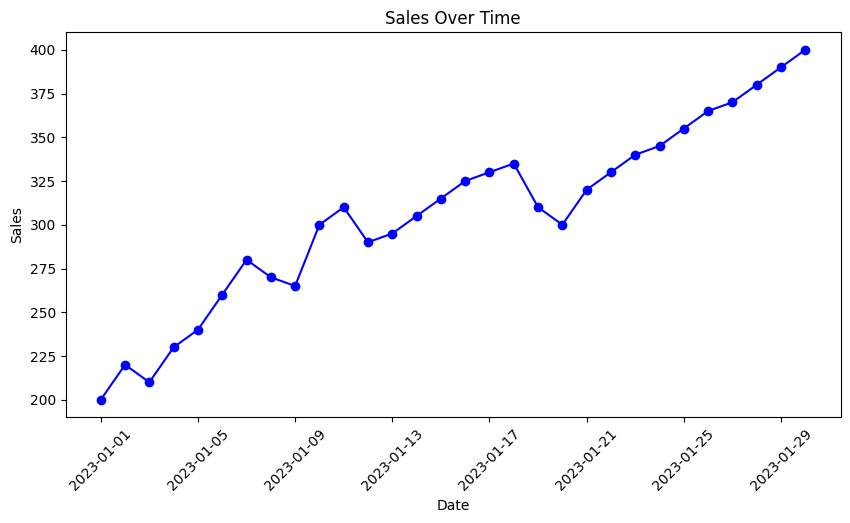

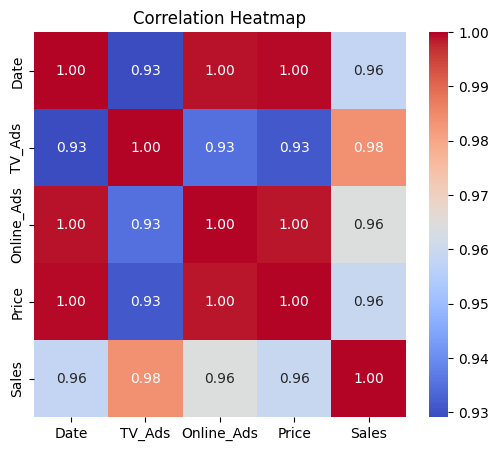

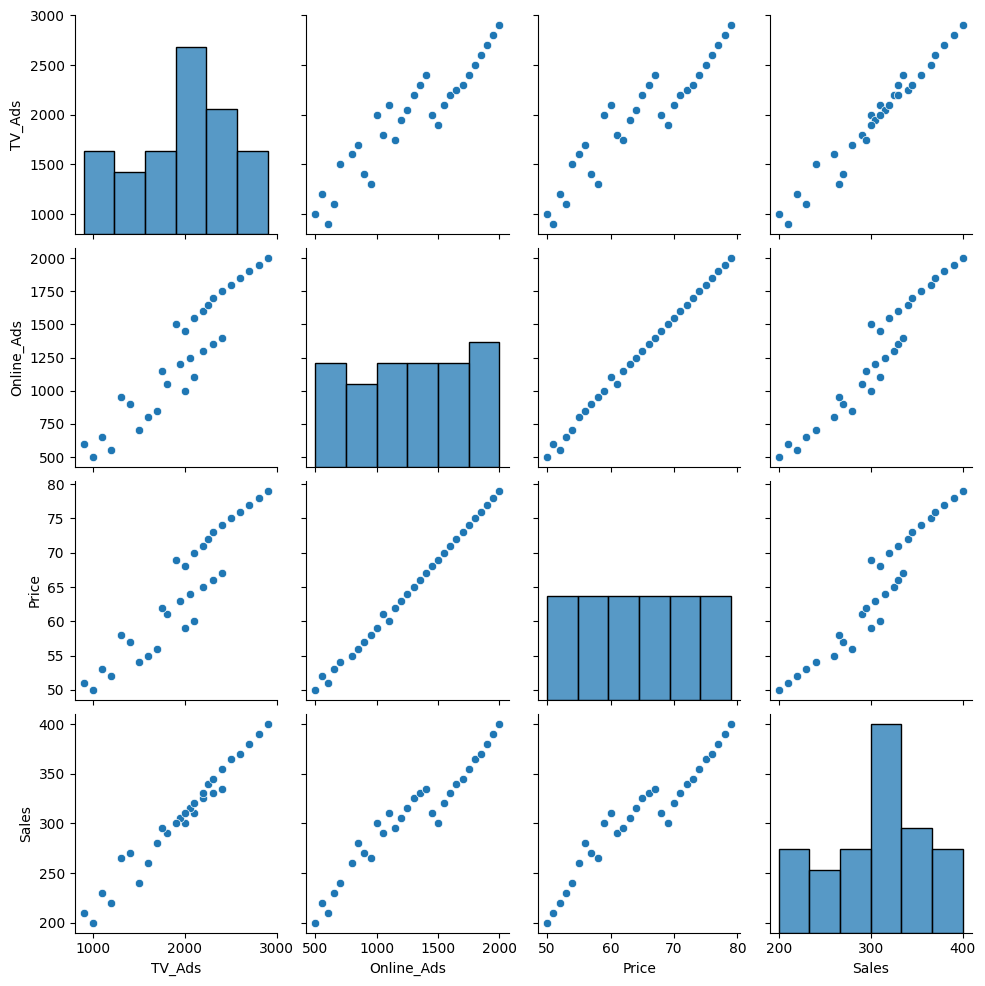

In [ ]:
# ==============================
# STEP 3: EDA
# ==============================

# Data info
print(df.info())
print(df.describe())

# Check missing values
print("Missing values:\n", df.isnull().sum())

# Sales trend over time
plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Sales'], marker='o', color='blue')
plt.title("Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.show()

# Correlation heatmap
plt.figure(figsize=(6,5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Pairplot for relationships
sns.pairplot(df[['TV_Ads','Online_Ads','Price','Sales']])
plt.show()


## Step 4: Feature Selection & Train-Test Split & model evaluation

In [ ]:
# ==============================
# STEP 4: Feature Selection
# ==============================
X = df[['TV_Ads', 'Online_Ads', 'Price']]
y = df['Sales']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ==============================
# STEP 5: Train Model
# ==============================
model = LinearRegression()
model.fit(X_train, y_train)

# Model coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Predictions
y_pred = model.predict(X_test)

# ==============================
# STEP 6: Model Evaluation
# ==============================
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R² Score:", r2)   # Target ≈ 0.87


Intercept: 300.2246628627234
Coefficients: [ 0.06898106  0.1232975  -4.43464919]
MAE: 3.9275744579980625
RMSE: 6.72418651922412
R² Score: 0.9649950830874978


## Step5: Visualization of Model

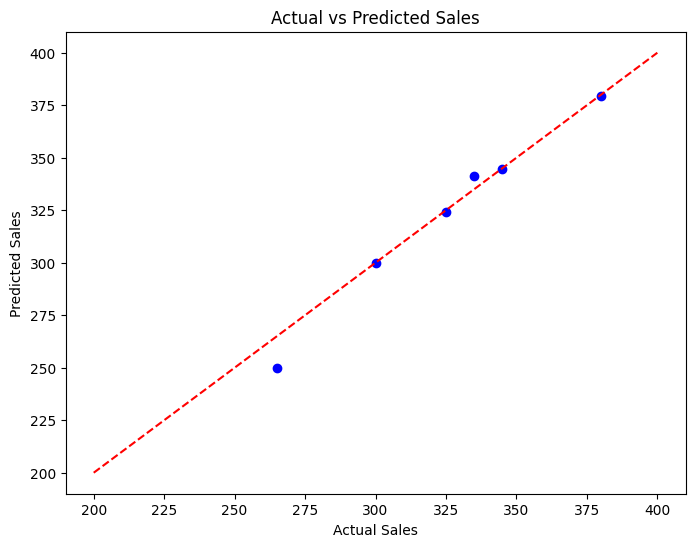

   Actual   Predicted
0     380  379.270779
1     325  324.017541
2     345  344.757454
3     335  341.274204
4     265  249.823009


In [ ]:
# ==============================
# STEP 7: Visualization
# ==============================
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()

# Compare actual vs predicted
results = pd.DataFrame({"Actual": y_test.values, "Predicted": y_pred})
print(results.head())


##Step 6 : Future forcasted sales

In [ ]:
# ==============================
# STEP 8: Forecast Future Sales
# ==============================
future_data = pd.DataFrame({
    "TV_Ads": [1800, 2200],
    "Online_Ads": [800, 1200],
    "Price": [55, 60]
})

forecast = model.predict(future_data)
print("Forecasted Sales:", forecast)


Forecasted Sales: [279.12285924 333.86103637]
